In [1]:
from matplotlib import pyplot as plt
import networkx as nx
import random
import numpy as np

In [7]:
class SocialDynamicsSimulation:
    '''
    Simulate social dynamics by strengthening opinions and connection weights
    based on random interactions between nodes.
    '''

    def __init__(self, network_size=50, alpha=0.03, beta=0.3, gamma=4):
        '''
        Inputs:

            network_size (int) The number of nodes in the random Watts-Strogatz
              small-world network. Default: 50.

            alpha (float) The rate at which nodes adjust their opinions to
              match neighboring nodes' opinions during interactions.
              Default: 0.03.

            beta (float) The rate at which edge weights are changed in
              response to differing opinions. Default: 0.3.

            gamma (float) The pickiness of nodes. Nodes with opinions differing
              by more than 1/gamma will result in an edge weight decreasing.
              Default: 4.
        '''
        self.network_size = network_size
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma

    def initialize(self, init = "extreme", graph = "watts_strogatz"):
        '''
        Initialize the simulation with a random graph, with random 0 or 1
        opinions assigned to all nodes and initial edge weights of 0.5.
        '''
        if graph == "watts_strogatz":
            self.graph = nx.watts_strogatz_graph(self.network_size, 5, 0.5)
        elif graph == "barabasi":
            self.graph = nx.barabasi_albert_graph(self.network_size, 3)
        for edge in self.graph.edges:
            self.graph.edges[edge]['weight'] = 0.5
        for node in self.graph.nodes:
            if init == "extreme":
                self.graph.nodes[node]['opinion'] = random.randint(0, 1)
            elif init == "beta":
                self.graph.nodes[node]['opinion'] = np.random.beta(0.5, 0.5)
        self.layout = nx.spring_layout(self.graph)  # Initial visual layout
        self.step = 0

    def observe(self):
        '''
        Draw the state of the network.
        '''
        self.layout = nx.spring_layout(self.graph, pos = self.layout, iterations=5)
        plt.clf()
        nx.draw(
            self.graph, pos=self.layout, with_labels=True,
            node_color=[self.graph.nodes[i]['opinion'] for i in self.graph.nodes],
            edge_color=[self.graph.edges[i, j]['weight'] for i, j in self.graph.edges],
            edge_cmap=plt.cm.binary, edge_vmin=0, edge_vmax=1,
            alpha=0.7, vmin=0, vmax=1)
        plt.title('Step: ' + str(self.step))

    def update(self):
        if random.uniform(0, 1) < 0.01:
            # Create a new edge with weight 0.5 between two unconnected nodes
            nodes = list(self.graph.nodes)
            while True:
                new_edge = random.sample(nodes, 2)
                if new_edge not in self.graph.edges:
                    break
            self.graph.add_edge(new_edge[0], new_edge[1], weight=0.5)
        else:
            # Select a random edge and update node opinions and edge weight
            edge = random.choice(list(self.graph.edges))
            weight = self.graph.edges[edge]['weight']
            #print ('before', weight)
            opinions = [self.graph.nodes[n]['opinion'] for n in edge]
            #print ('opbefore', opinions)
            for i in [0, 1]:
                self.graph.nodes[edge[i]]['opinion'] = (
                    opinions[i] + self.alpha * weight * (opinions[1-i] - opinions[i]))
            self.graph.edges[edge]['weight'] = (
                weight +
                self.beta * weight * (1-weight) *
                (1 - self.gamma * abs(opinions[0] - opinions[1])))
            #print ('after', self.graph.edges[edge]['weight'])
            #print ('opafter', (self.graph.nodes[edge[0]]['opinion'], self.graph.nodes[edge[1]]['opinion']))
            # Remove very weak connections
            if self.graph.edges[edge]['weight'] < 0.05:
                self.graph.remove_edge(*edge)
        self.step += 1

In [13]:
def plot_result(sim, step, gap):
    plt.figure()
    sim.observe()
    for i in range(step):
        for i in range(gap):
            sim.update()
        plt.figure()
        sim.observe()

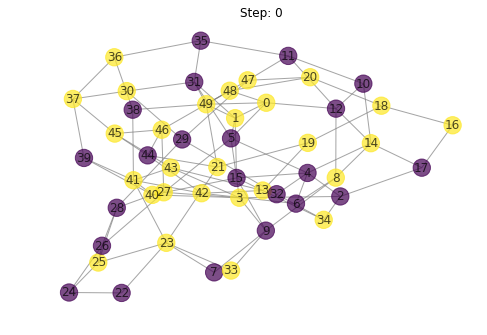

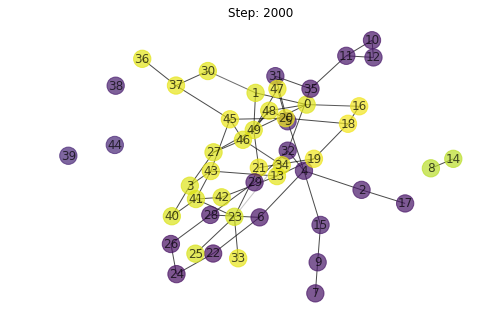

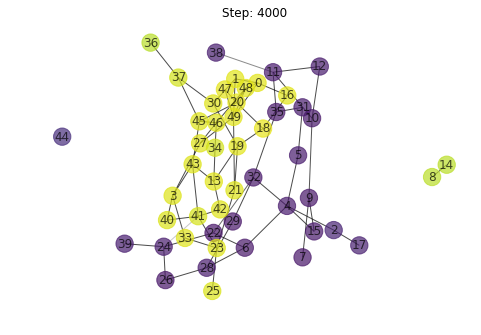

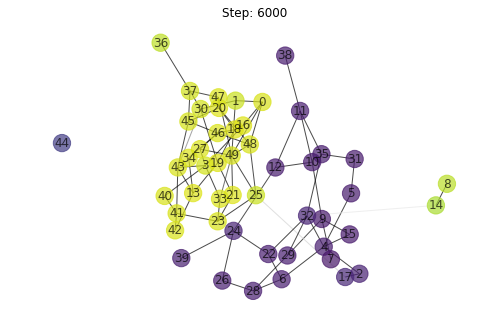

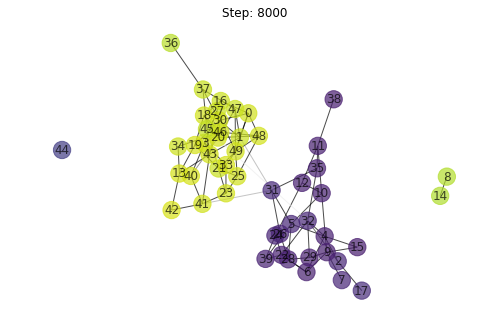

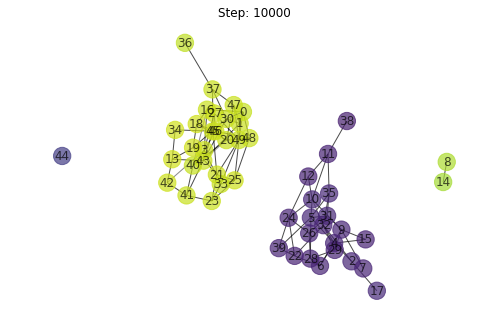

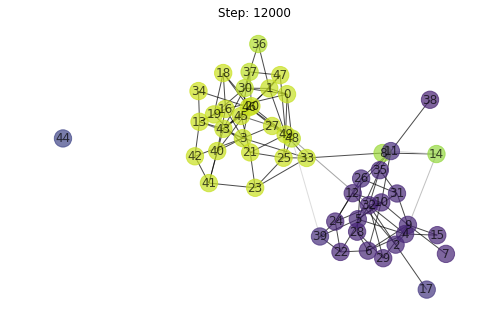

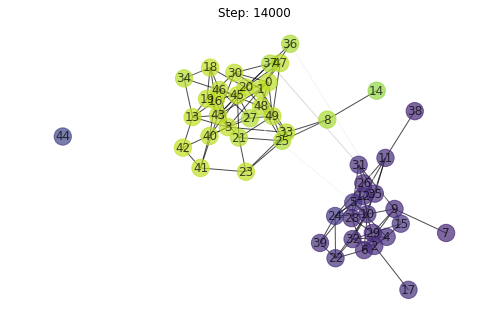

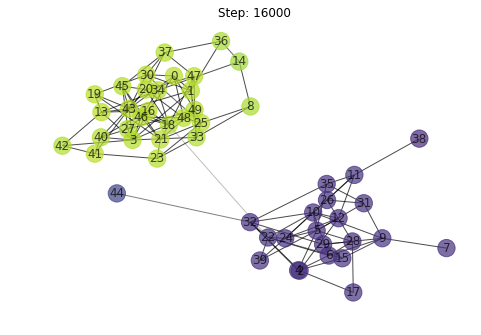

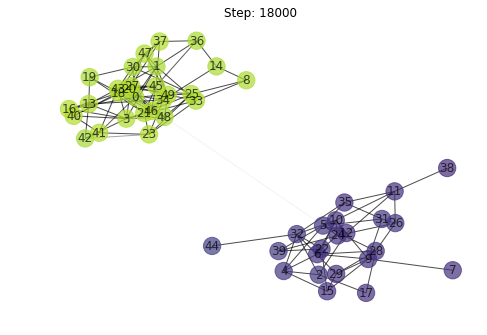

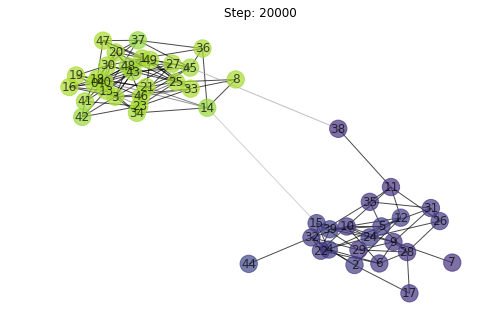

In [14]:
#Basic model with extreme initialization
sim1 = SocialDynamicsSimulation()
sim1.initialize(init="extreme")
plot_result(sim1,10,2000)

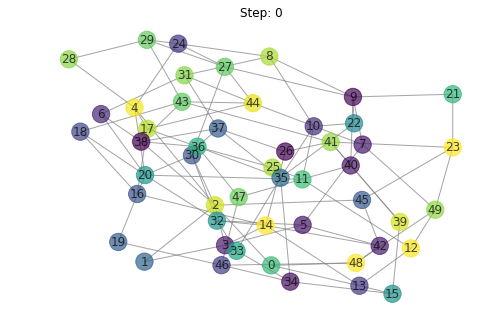

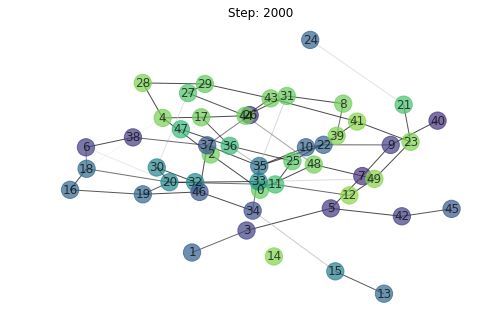

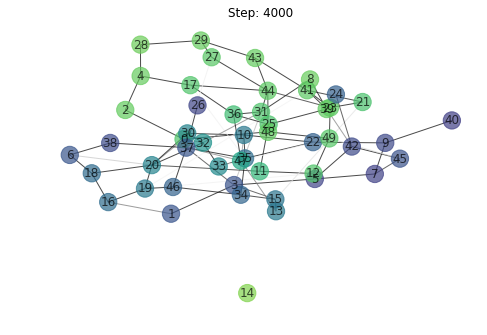

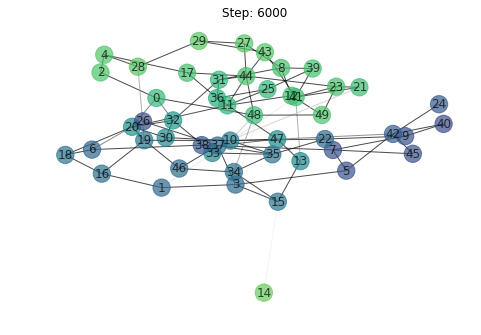

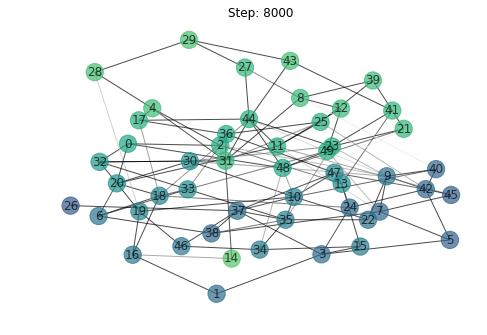

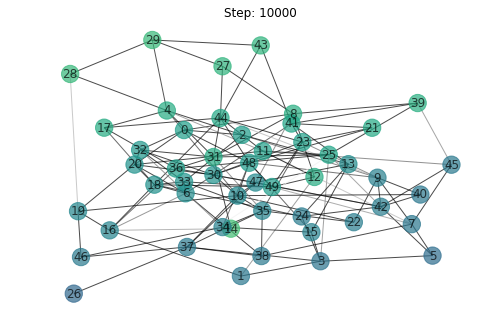

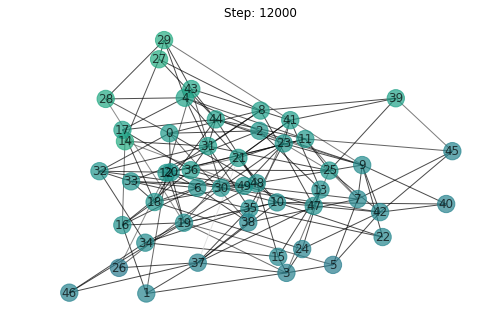

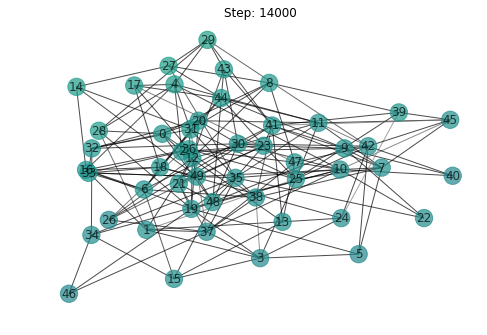

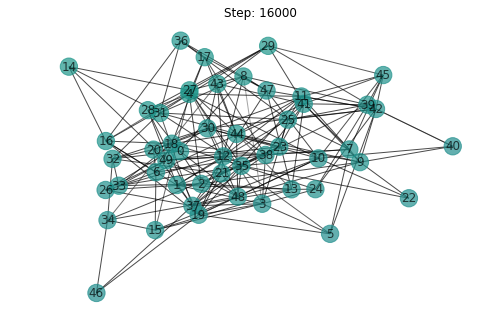

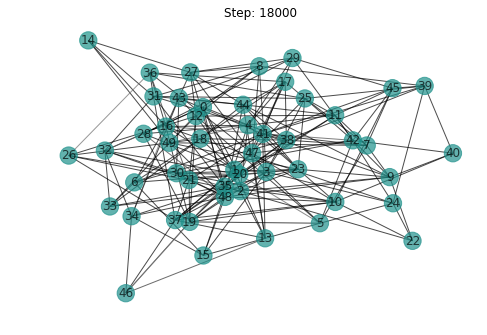

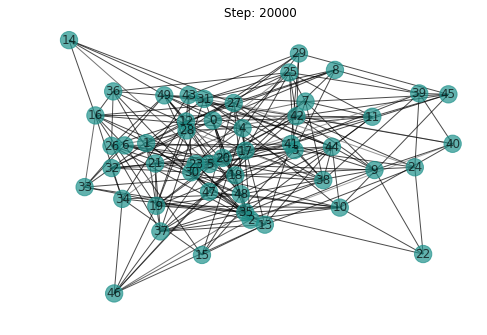

In [18]:
#Basic model with non-extreme initialization
sim2 = SocialDynamicsSimulation()
sim2.initialize(init="beta")
plot_result(sim2,10,2000)

In [26]:
class MultipleTopicsSimulation: 
    '''
    Simulate social dynamics by strengthening opinions and connection weights
    based on random interactions between nodes.
    '''

    def __init__(self, network_size=50, alpha=0.03, beta=0.3, gamma=4, n_topics=3):
        '''
        Inputs:

            network_size (int) The number of nodes in the random Watts-Strogatz
              small-world network. Default: 50.

            alpha (float) The rate at which nodes adjust their opinions to
              match neighboring nodes' opinions during interactions.
              Default: 0.03.

            beta (float) The rate at which edge weights are changed in
              response to differing opinions. Default: 0.3.

            gamma (float) The pickiness of nodes. Nodes with opinions differing
              by more than 1/gamma will result in an edge weight decreasing.
              Default: 4.
              
            n_topics (int) The number of topics that two people can have 
              conversations about. Default: 3. 
        '''
        self.network_size = network_size
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma
        self.n_topics = n_topics

    def initialize(self):
        '''
        Initialize the simulation with a random graph, with random 0 or 1
        opinions assigned to all nodes and initial edge weights of 0.5.
        '''
        self.graph = nx.watts_strogatz_graph(50, 5, 0.5)
        for edge in self.graph.edges:
            self.graph.edges[edge]['weight'] = 0.5
        for node in self.graph.nodes:
            self.graph.nodes[node]['opinion'] = [random.randint(0, 1) for i in range(self.n_topics)]
        self.layout = nx.spring_layout(self.graph)  # Initial visual layout
        self.step = 0

    def observe(self):
        '''
        Draw the state of the network.
        '''
        self.layout = nx.spring_layout(self.graph, pos = self.layout, iterations=5)
        plt.clf()
        for t in range(self.n_topics):
            plt.figure(t+1)
            nx.draw(
                self.graph, pos=self.layout, with_labels=True,
                node_color=[self.graph.nodes[i]['opinion'][t] for i in self.graph.nodes],
                edge_color=[self.graph.edges[i, j]['weight'] for i, j in self.graph.edges],
                edge_cmap=plt.cm.binary, edge_vmin=0, edge_vmax=1,
                alpha=0.7, vmin=0, vmax=1)
            plt.title('Topic: ' + str(t) + ', Step: ' + str(self.step))
            plt.show()

    def update(self):
        if random.uniform(0, 1) < 0.01:
            # Create a new edge with weight 0.5 between two unconnected nodes
            nodes = list(self.graph.nodes)
            while True:
                new_edge = random.sample(nodes, 2)
                if new_edge not in self.graph.edges:
                    break
            self.graph.add_edge(new_edge[0], new_edge[1], weight=0.5)
        else:
            # Select a random edge and update node opinions and edge weight
            edge = random.choice(list(self.graph.edges))
            weight = self.graph.edges[edge]['weight']
            # Select one topic for two nodes to have a conversation about:
            topic = random.randint(0, self.n_topics-1)
            # Adjust the opinion values for that topic
            opinions = [self.graph.nodes[n]['opinion'][topic] for n in edge]
            for i in [0, 1]:
                self.graph.nodes[edge[i]]['opinion'][topic] = (
                    opinions[i] + self.alpha * weight * (opinions[1-i] - opinions[i]))
            #Adjust the weight of connection: 
            self.graph.edges[edge]['weight'] = (
                weight +
                self.beta * weight * (1-weight) *
                (1 - self.gamma * abs(opinions[0] - opinions[1])))
            # Remove very weak connections
            if self.graph.edges[edge]['weight'] < 0.05:
                self.graph.remove_edge(*edge)
        self.step += 1

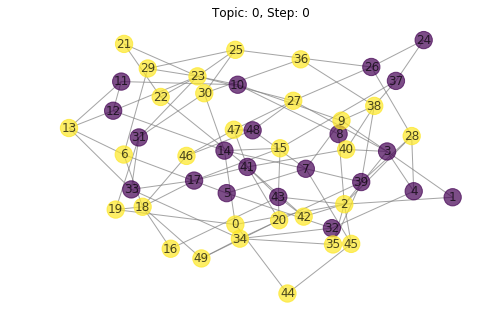

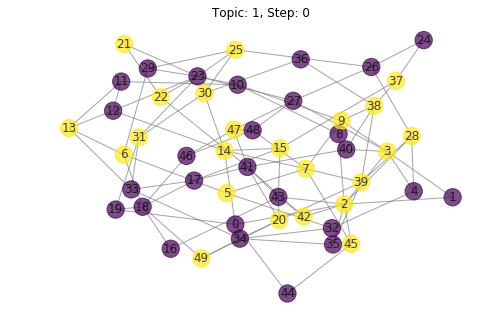

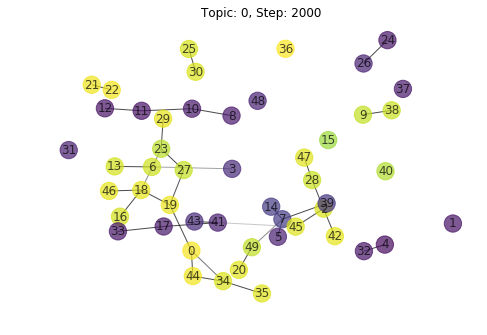

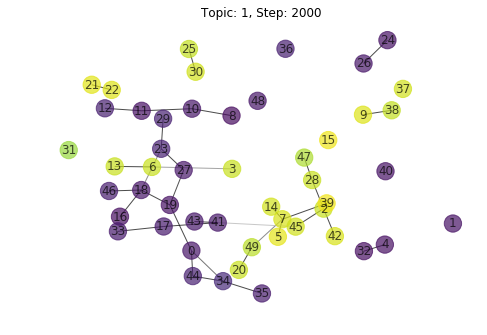

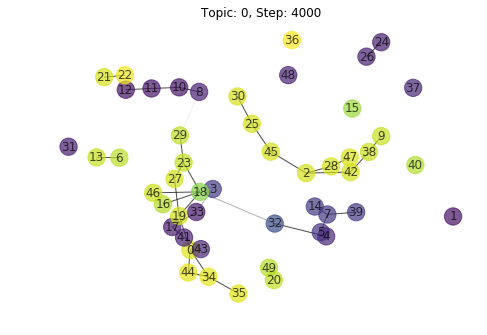

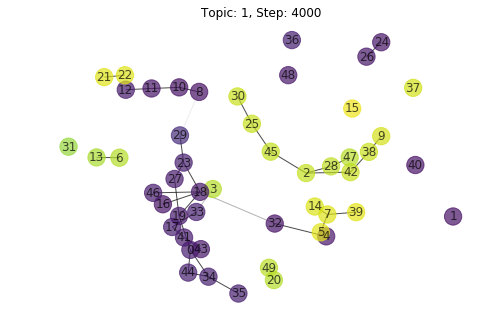

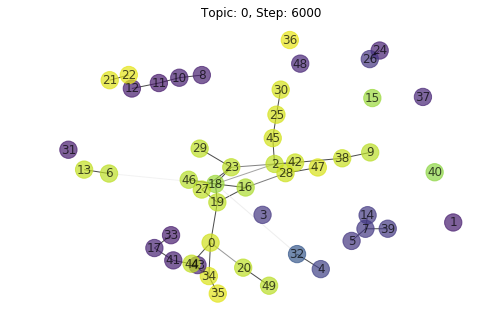

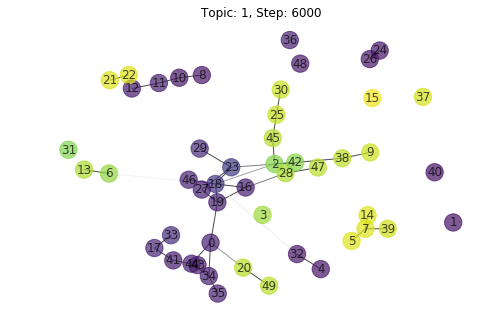

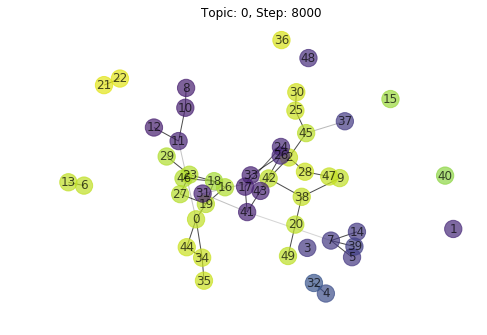

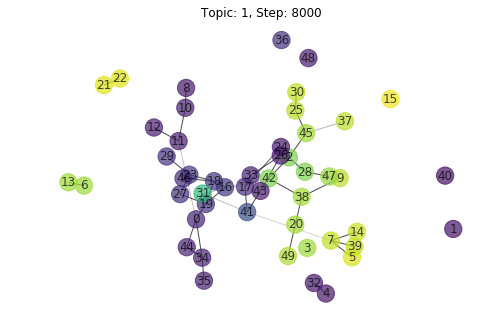

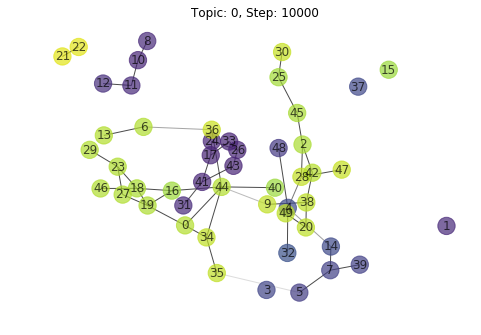

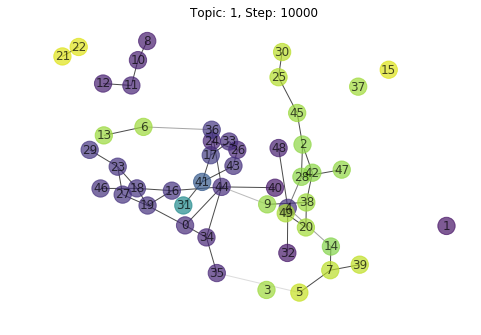

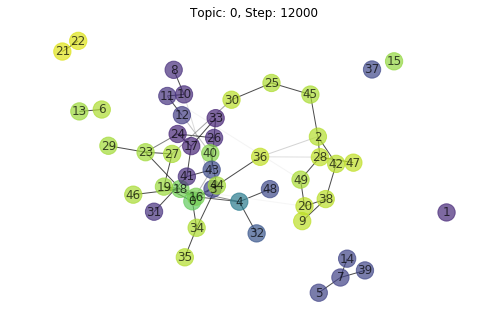

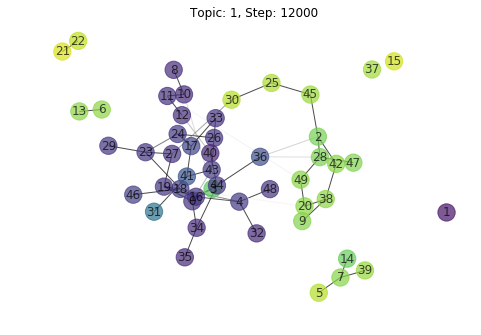

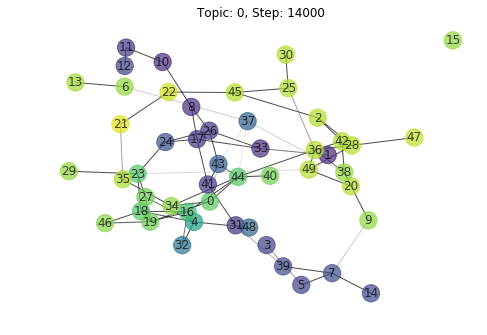

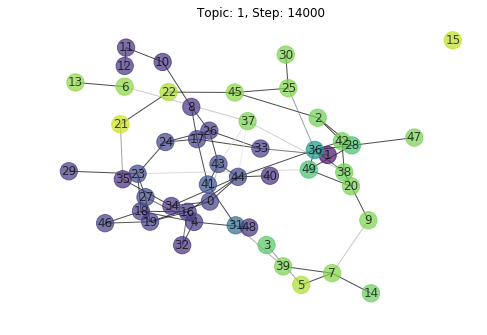

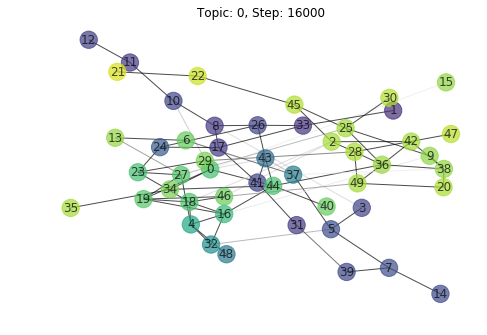

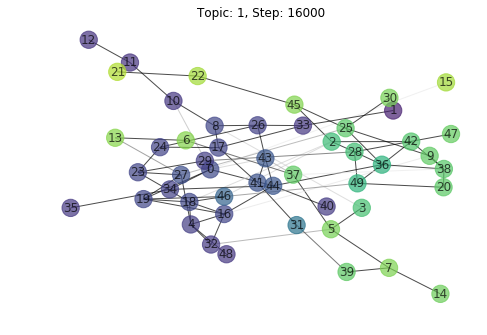

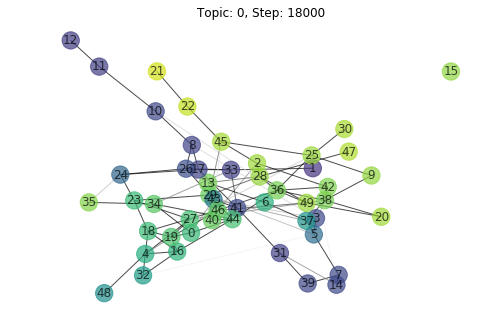

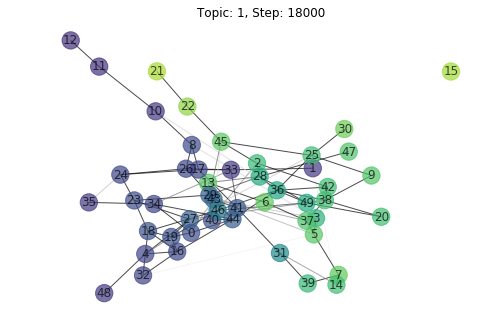

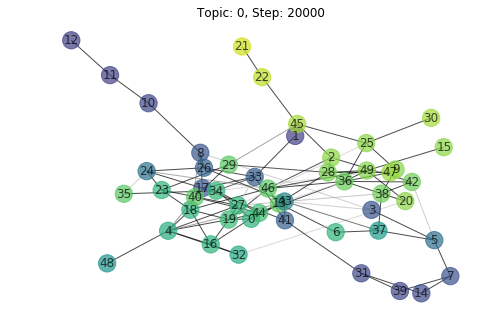

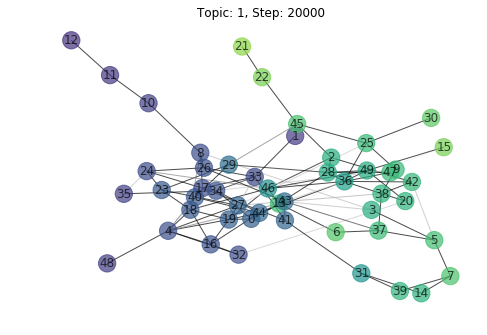

In [28]:
sim3 = MultipleTopicsSimulation(network_size=100, n_topics=2)
sim3.initialize()
plot_result(sim3,10,2000)

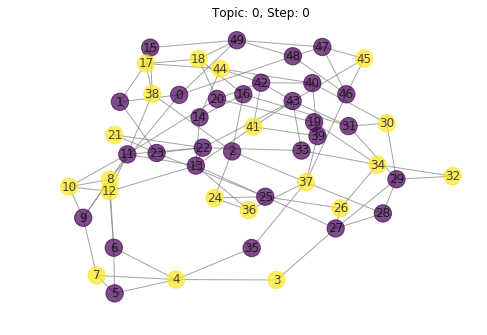

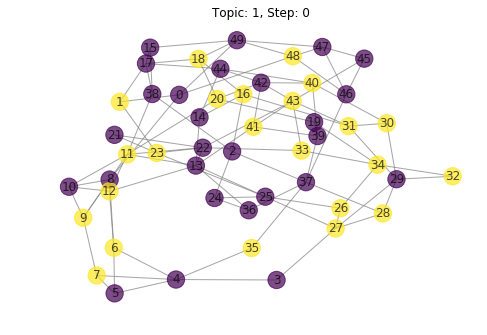

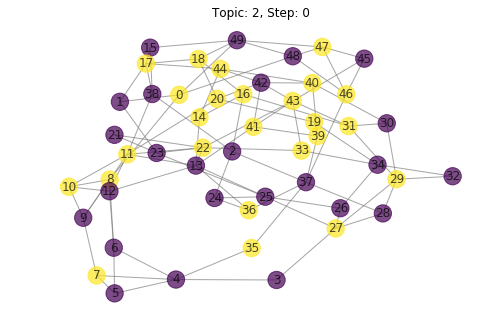

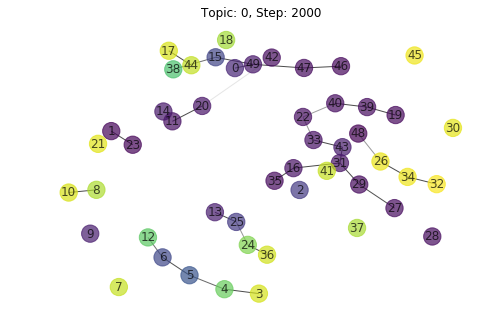

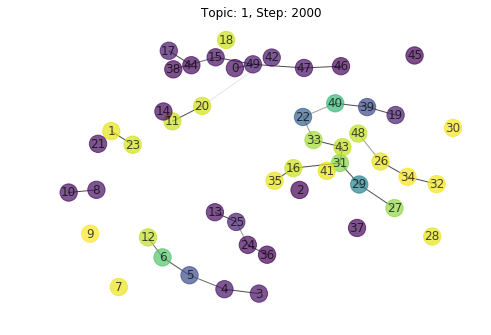

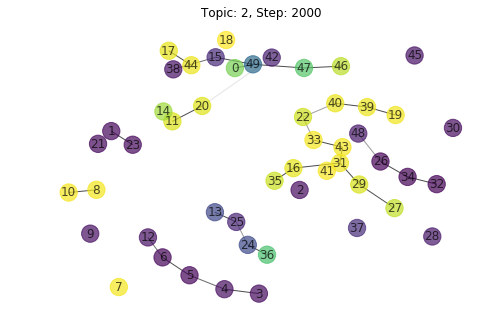

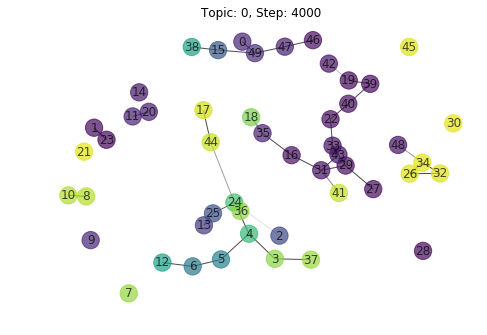

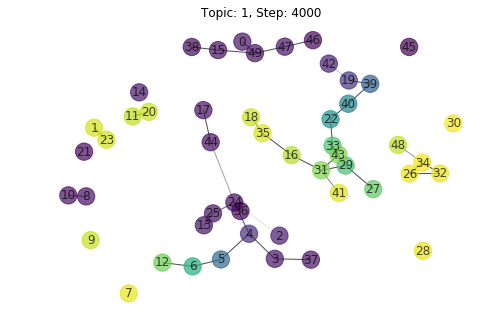

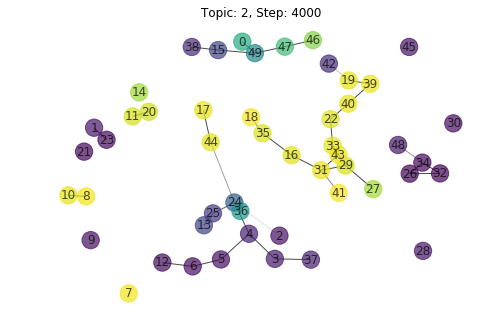

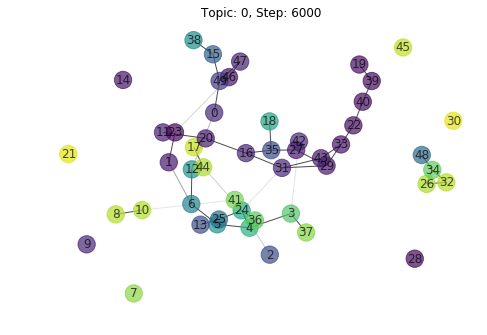

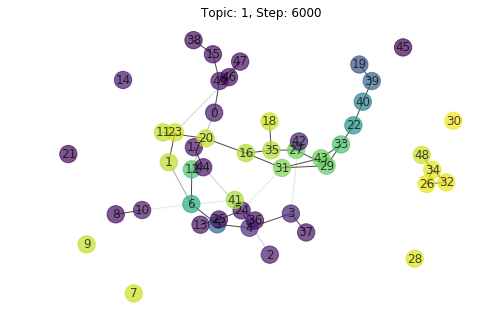

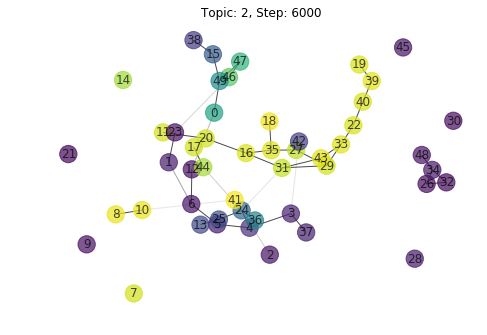

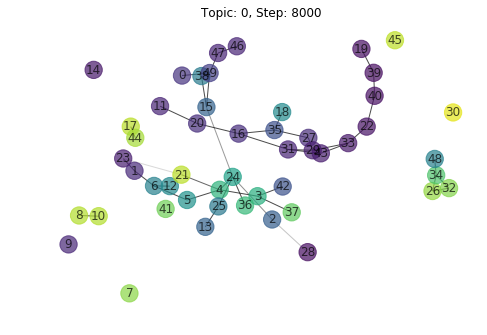

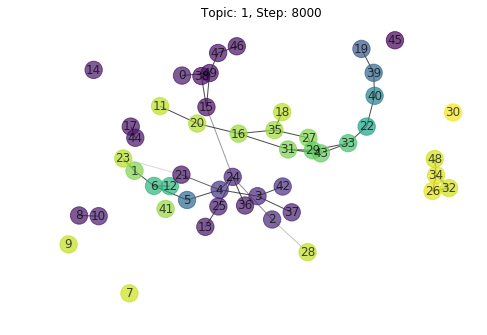

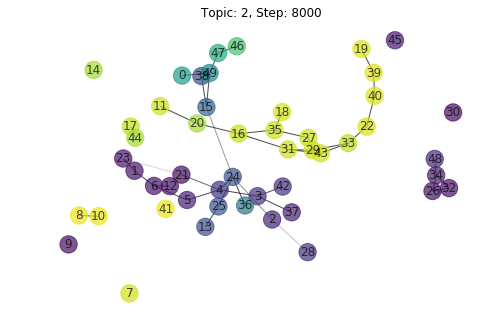

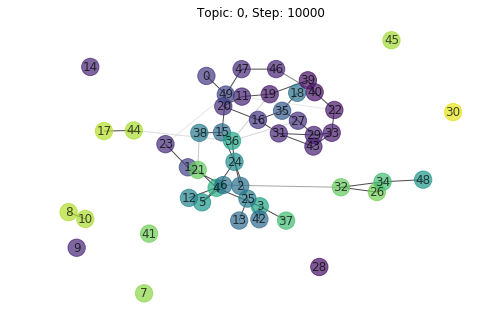

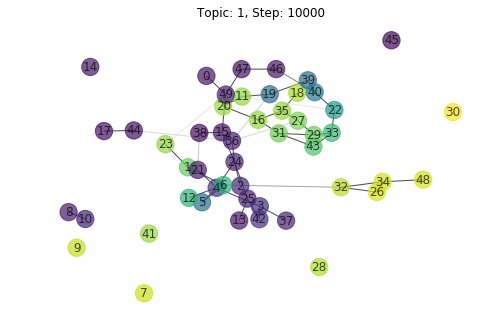

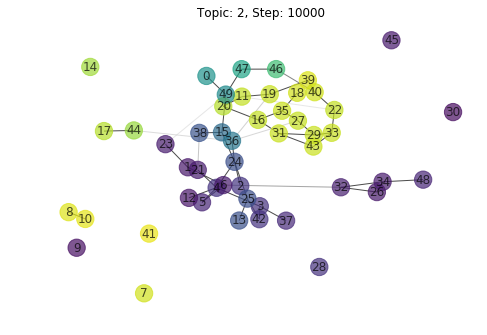

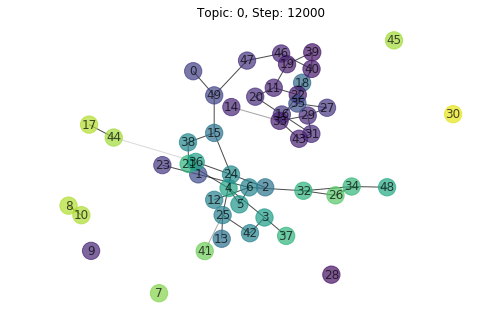

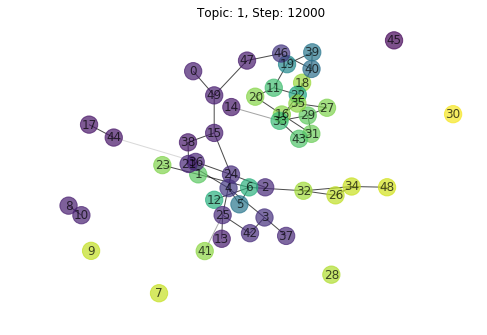

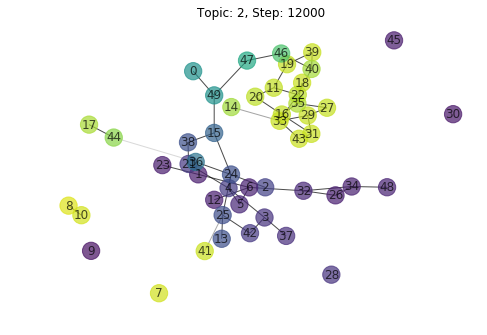

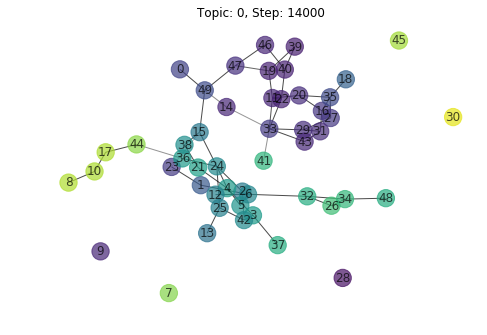

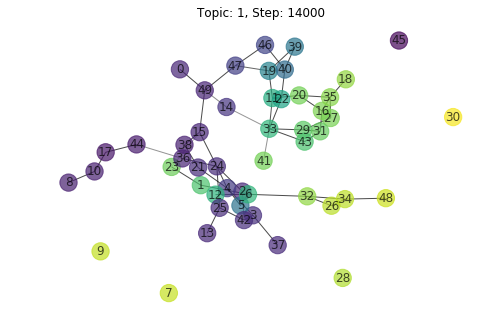

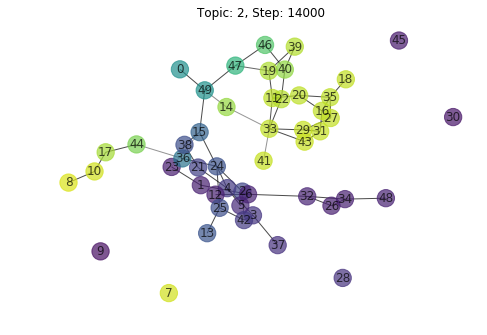

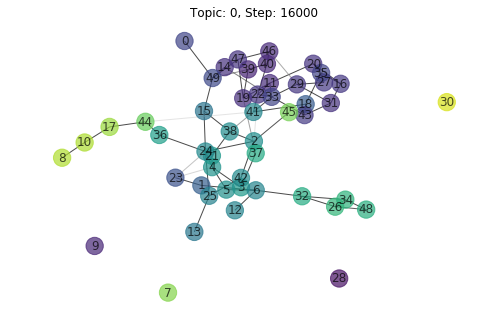

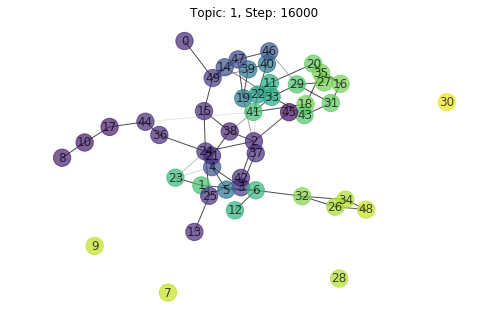

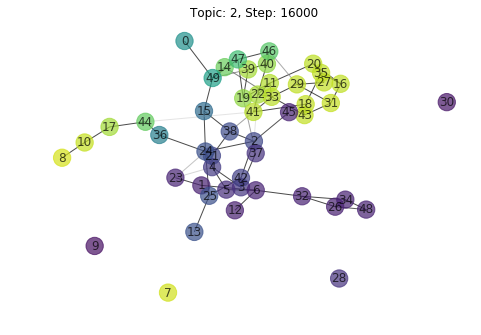

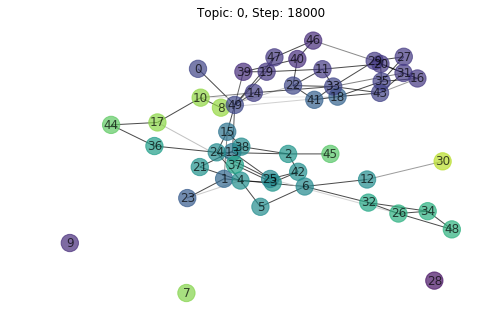

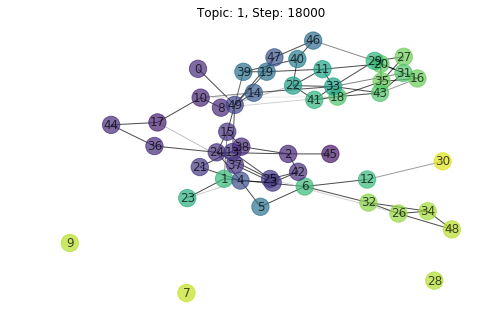

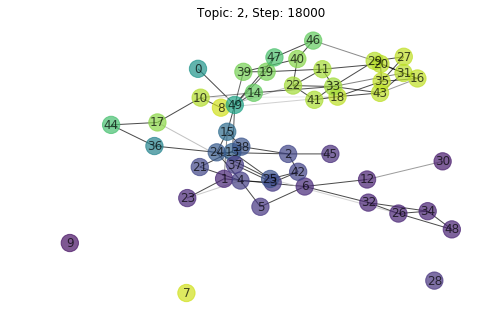

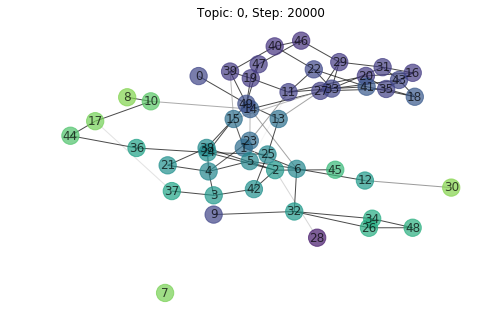

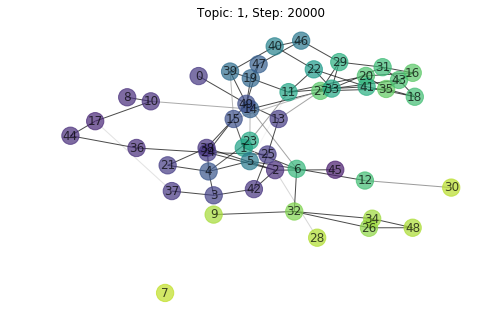

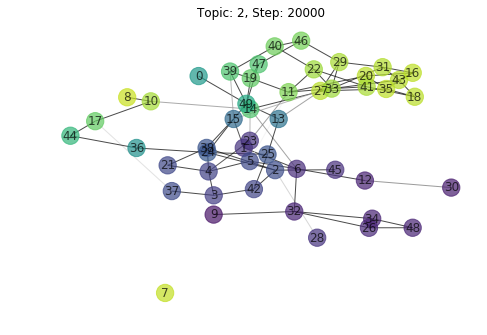

In [29]:
sim4 = MultipleTopicsSimulation(network_size=100, n_topics=3)
sim4.initialize()
plot_result(sim4,10,2000)

In [31]:
class RelationshipTypesSimulation:
    '''
    Simulate social dynamics by strengthening opinions and connection weights
    based on random interactions between nodes.
    '''

    def __init__(self, network_size=50, alpha=0.03, beta=0.3, gamma=4):
        '''
        Inputs:

            network_size (int) The number of nodes in the random Watts-Strogatz
              small-world network. Default: 50.

            alpha (float) The rate at which nodes adjust their opinions to
              match neighboring nodes' opinions during interactions.
              Default: 0.03.

            beta (float) The rate at which edge weights are changed in
              response to differing opinions. Default: 0.3.

            gamma (float) The pickiness of nodes. Nodes with opinions differing
              by more than 1/gamma will result in an edge weight decreasing.
              Default: 4.
        '''
        self.network_size = network_size
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma

    def initialize(self):
        '''
        Initialize the simulation with a random graph, with random 0 or 1
        opinions assigned to all nodes and initial edge weights of 0.
        '''
        self.graph = nx.watts_strogatz_graph(50, 5, 0.5)
        for edge in self.graph.edges:
            self.graph.edges[edge]['weight'] = np.random.choice([0.5, -0.5])
            #self.graph.edges[edge]['weight'] = 0.5
        for node in self.graph.nodes:
            self.graph.nodes[node]['opinion'] = random.uniform(0, 1)
        self.layout = nx.spring_layout(self.graph)  # Initial visual layout
        self.step = 0

    def observe(self):
        '''
        Draw the state of the network.
        '''
        self.layout = nx.spring_layout(self.graph, pos = self.layout, iterations=5)
        plt.clf()
        nx.draw(
            self.graph, pos=self.layout, with_labels=True,
            node_color=[self.graph.nodes[i]['opinion'] for i in self.graph.nodes],
            edge_color=['Red' if self.graph.edges[i, j]['weight'] < 0 else 'Blue' for i, j in self.graph.edges],
            width = [self.graph.edges[i, j]['weight'] for i, j in self.graph.edges])
#             edge_color=[self.graph.edges[i, j]['weight'] for i, j in self.graph.edges],
            #edge_cmap=plt.cm.binary, edge_vmin=-1, edge_vmax=1,
            #alpha=0.7, vmin=0, vmax=1))
        plt.title('Step: ' + str(self.step))

    def update(self):
        if random.uniform(0, 1) < 0.01:
            # Create a new edge with weight 0.5 between two unconnected nodes
            nodes = list(self.graph.nodes)
            while True:
                new_edge = random.sample(nodes, 2)
                if new_edge not in self.graph.edges:
                    break
            self.graph.add_edge(new_edge[0], new_edge[1], weight=0)
        else:
            # Select a random edge and update node opinions and edge weight
            edge = random.choice(list(self.graph.edges))
            weight = self.graph.edges[edge]['weight']
            #print ('before', weight)
            opinions = [self.graph.nodes[n]['opinion'] for n in edge]
            #print ('opbefore', opinions)
            for i in [0, 1]:
                self.graph.nodes[edge[i]]['opinion'] = (
                    opinions[i] + self.alpha * weight * (opinions[1-i] - opinions[i]))
                if self.graph.nodes[edge[i]]['opinion'] > 1:
                    self.graph.nodes[edge[i]]['opinion'] = 1
                if self.graph.nodes[edge[i]]['opinion'] < -1:
                    self.graph.nodes[edge[i]]['opinion'] = -1
                    
            #print ('opafter', (self.graph.nodes[edge[0]]['opinion'],self.graph.nodes[edge[1]]['opinion']))
            delta = self.beta * (weight) * (1-weight) * (1 - self.gamma * abs(opinions[0] - opinions[1]))
            if weight < 0: 
                self.graph.edges[edge]['weight'] += delta
                
            self.graph.edges[edge]['weight'] += delta
            if self.graph.edges[edge]['weight'] > 1:
                self.graph.edges[edge]['weight'] = 1
            if self.graph.edges[edge]['weight'] < -1:
                self.graph.edges[edge]['weight'] = -1
            #print ('after', self.graph.edges[edge]['weight'])
      #Remove very weak connections
            if abs(self.graph.edges[edge]['weight']) < 0.05:
                    #print (*edge)
                self.graph.remove_edge(*edge)
        self.step += 1

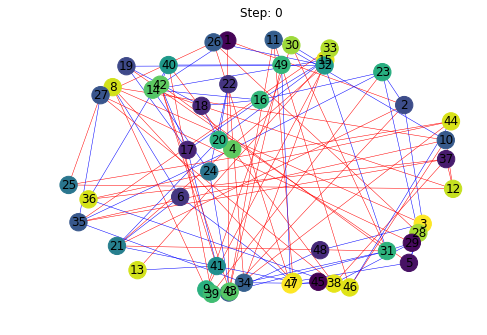

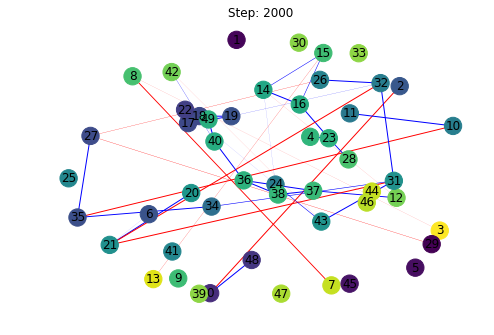

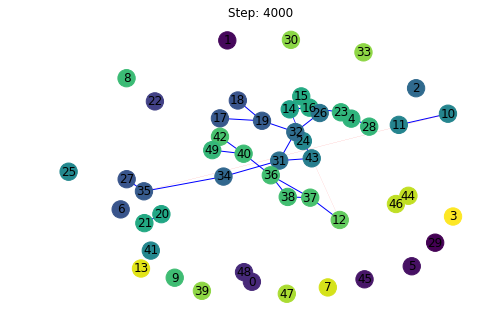

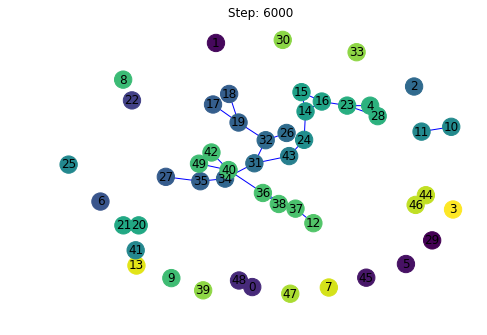

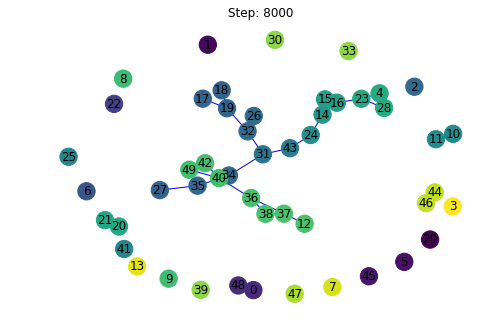

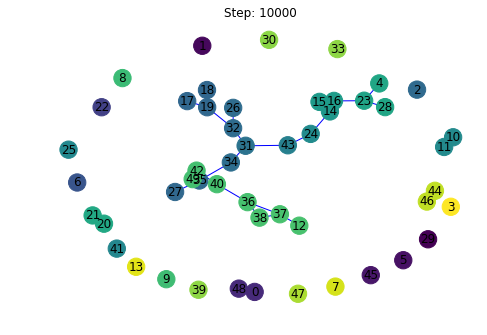

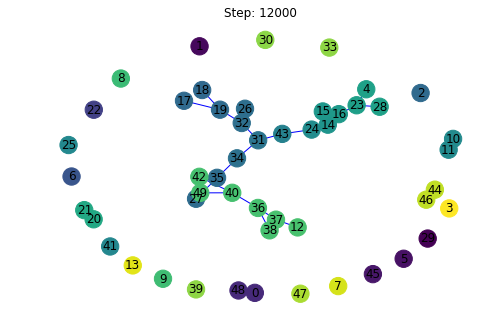

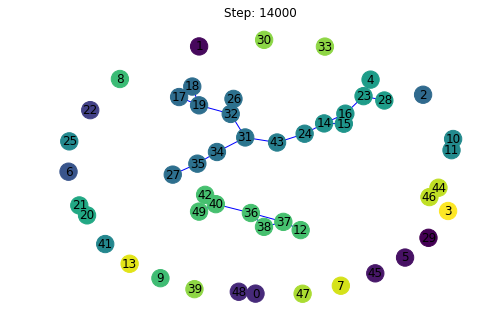

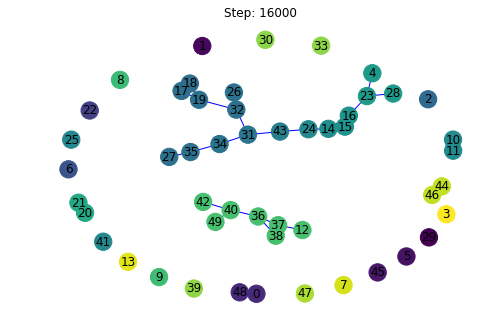

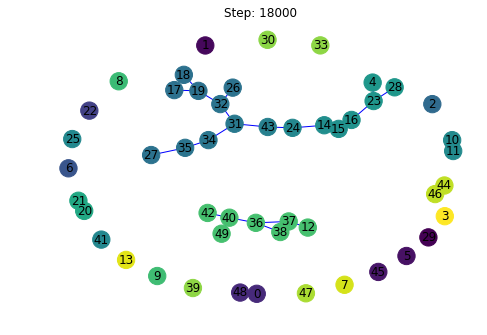

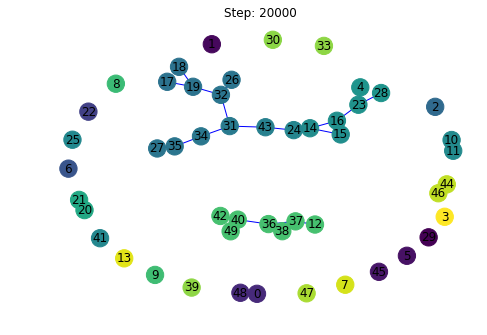

In [32]:
sim5 = RelationshipTypesSimulation(gamma=6)
sim5.initialize()
plot_result(sim5, 10, 2000)

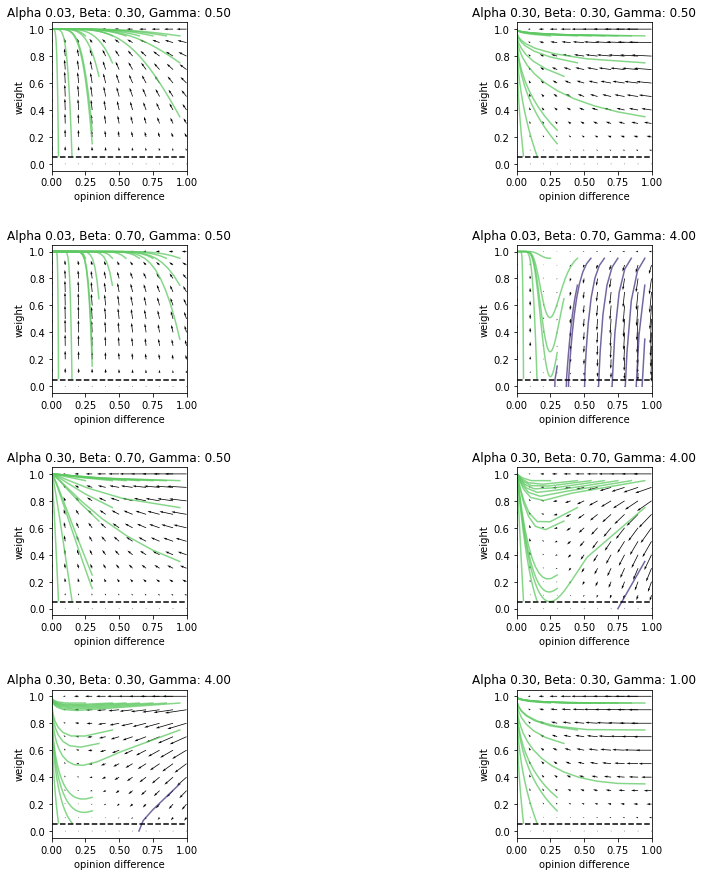

In [45]:
#Plot vector field for the basic model: 
#Code adapted from Prof Scheffler's answer for Preclass Work Section 7.2
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
import scipy

params = [[0.03, 0.3, 0.5], [0.3, 0.3, 0.5], [0.03, 0.7, 0.5], [0.03, 0.7, 4], \
          [0.3, 0.7, 0.5], [0.3, 0.7, 4], [0.3, 0.3, 4], [0.3, 0.3, 1]]
cmap = plt.cm.viridis  # color map to use


# Plot traces of how opinion and weight change over timehhhiv
traces = np.array([
    [0.25, 0.95], [0.45, 0.95], [0.55, 0.95], [0.65, 0.95], [0.75, 0.95],
    [0.85, 0.95], [0.95, 0.95], [0.35, 0.65], [0.45, 0.75], [0.95, 0.75],
    [0.95, 0.35], [0.3, 0.25], [0.3, 0.15], [0.15, 0.06], [0.05, 0.06]
])
fig, axes = plt.subplots(4, 2, figsize = (15,15))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.25, hspace=0.5)

for index, param in enumerate(params):
    alpha, beta, gamma = param
    plt.subplot(4, 2, index + 1)
    for opinion, weight in np.vstack((traces)):
        ow = [[opinion, 0.0, weight]]
        for i in range(100):
            delta_o = alpha * ow[-1][2] * (ow[-1][1] - ow[-1][0])
            delta_w = (
                beta * abs(ow[-1][2]) * (1-ow[-1][2]) *
                (1-gamma*abs(ow[-1][1] - ow[-1][0])))
            new_weight = ow[-1][2] + delta_w
            if new_weight < 0.05:
                new_weight = 0
            ow.append([ow[-1][0] + delta_o, ow[-1][1] - delta_o, new_weight])
        plt.plot(
            [row[0] - row[1] for row in ow],
            [row[2] for row in ow],
            color=(cmap(0.15) if ow[-1][2] == 0 else cmap(0.75)),
            alpha=0.75)

    # Plot vector field
    opinion = scipy.linspace(0, 1, 11)  # the difference in opinion, |o_i - o_j|
    weight = scipy.linspace(0, 1, 11)   # the edge weight, w_ij
    ow_grid = scipy.meshgrid(opinion, weight)
    delta_o_grid = -2*alpha * ow_grid[1] * ow_grid[0]
    delta_w_grid = beta * ow_grid[1] * (1-ow_grid[1]) * (1 - gamma * ow_grid[0])
    plt.quiver(ow_grid[0], ow_grid[1], delta_o_grid, delta_w_grid)

    # Annotate plot
    plt.xlabel('opinion difference')
    plt.ylabel('weight')
    plt.plot([0, 1], [0.05, 0.05], 'k--')
    plt.axis('square')
    plt.xlim(0, 1)
    plt.title("Alpha %.2f, Beta: %.2f, Gamma: %.2f" %(alpha, beta, gamma))
    
plt.savefig("vector_plot1.png")



In [41]:
#Plot vector field for Destructive vs Constructive Relationship: 
#Code adapted from Prof Scheffler's answer for Preclass Work Section 7.2
import matplotlib.pyplot as plt
import itertools
import scipy

def vector_field_negative(alpha, beta, gamma):

    plt.figure(figsize=(3,6))
    cmap = plt.cm.viridis  # color map to use
    for opinion, weight in [
        [0.25, 0.95], [0.45, 0.95], [0.55, 0.95], [0.65, 0.95], [0.75, 0.95],
        [0.85, 0.95], [0.95, 0.95], [0.35, 0.65], [0.45, 0.75], [0.95, 0.75],
        [0.95, 0.35], [0.3, 0.25], [0.3, 0.15], [0.15, 0.06], [0.05, 0.06]
    ]:
            ow = [[opinion, 0.0, weight]]
            for i in range(100):
                delta_o = alpha * ow[-1][2] * (ow[-1][1] - ow[-1][0])
                delta_w = (
                    beta * abs(ow[-1][2]) * (1-ow[-1][2]) *
                    (1-gamma*abs(ow[-1][1] - ow[-1][0])))
                new_weight = ow[-1][2] + delta_w
                if new_weight < 0.05:
                    new_weight = 0
                if new_weight < -1:
                    new_weight = -1
                ow.append([ow[-1][0] + delta_o, ow[-1][1] - delta_o, new_weight])
            plt.plot(
                [row[0] - row[1] for row in ow],
                [row[2] for row in ow],
                color=(cmap(0.15) if ow[-1][2] == 0 else cmap(0.75)),
                alpha=0.75)


    # Plot vector field

    opinion = scipy.linspace(0, 1, 11)  # the difference in opinion, |o_i - o_j|
    weight = scipy.linspace(-1, 1, 11)   # the edge weight, w_ij
    ow_grid = scipy.meshgrid(opinion, weight)
    delta_o_grid = -2*alpha * ow_grid[1] * ow_grid[0]
    delta_w_grid = beta * ow_grid[1] * (1-ow_grid[1]) * (1 - gamma * ow_grid[0])
    plt.quiver(ow_grid[0], ow_grid[1], delta_o_grid, delta_w_grid)

    # Annotate plot
    plt.title("Vector field: Alpha %.2f, Beta: %.2f, Gamma: %.2f" %(alpha, beta, gamma))
    plt.xlabel('opinion difference')
    plt.ylabel('weight')
    plt.plot([0, 1], [0.05, 0.05], 'k--')
    plt.axis('square')
    plt.xlim((0,1))
    plt.show()



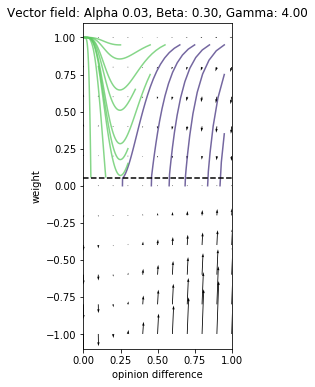

In [42]:
vector_field_negative(0.03, 0.3, 4)

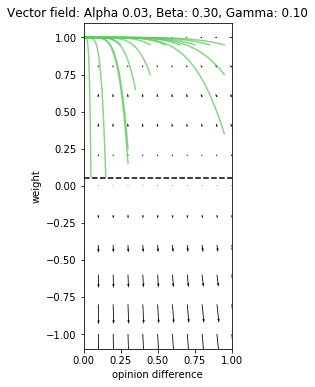

In [116]:
vector_field_negative(0.03, 0.3, 0.1)